Importing required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import  accuracy_score
from sklearn.manifold import TSNE
from sklearn.ensemble import BaggingClassifier
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import kmeans, vq, whiten

In [2]:
data = pd.read_csv("dow_jones_index.data")
data = data.drop(columns=['date']) # Data Drop. 
data.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [3]:
data.open = data.open.str.replace('$','')
data.high = data.high.str.replace('$','')
data.low = data.low.str.replace('$','')
data.close = data.close.str.replace('$','')
data.next_weeks_open = data.next_weeks_open.str.replace('$','')
data.next_weeks_close = data.next_weeks_close.str.replace('$','')

C:\Users\ARYANH~1\AppData\Local\Temp/ipykernel_26196/499768507.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.open = data.open.str.replace('$','')
C:\Users\ARYANH~1\AppData\Local\Temp/ipykernel_26196/499768507.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.high = data.high.str.replace('$','')
C:\Users\ARYANH~1\AppData\Local\Temp/ipykernel_26196/499768507.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.low = data.low.str.replace('$','')
C:\Users\ARYANH~1\AppData\Local\Temp/ipykernel_26196/4997

In [4]:
data.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   open                                750 non-null    object 
 3   high                                750 non-null    object 
 4   low                                 750 non-null    object 
 5   close                               750 non-null    object 
 6   volume                              750 non-null    int64  
 7   percent_change_price                750 non-null    float64
 8   percent_change_volume_over_last_wk  720 non-null    float64
 9   previous_weeks_volume               720 non-null    float64
 10  next_weeks_open                     750 non-null    object 
 11  next_weeks_close                    750 non-n

Here,we observe that there are 30 null values in two columns,so we remove all the null values.

In [6]:
data.isnull().sum()

quarter                                0
stock                                  0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [7]:
data.dropna(subset = ["percent_change_volume_over_last_wk"], inplace=True)
data.dropna(subset = ["previous_weeks_volume"], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 749
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             720 non-null    int64  
 1   stock                               720 non-null    object 
 2   open                                720 non-null    object 
 3   high                                720 non-null    object 
 4   low                                 720 non-null    object 
 5   close                               720 non-null    object 
 6   volume                              720 non-null    int64  
 7   percent_change_price                720 non-null    float64
 8   percent_change_volume_over_last_wk  720 non-null    float64
 9   previous_weeks_volume               720 non-null    float64
 10  next_weeks_open                     720 non-null    object 
 11  next_weeks_close                    720 non-n

In [9]:
data.stock.value_counts()

AA      24
AXP     24
WMT     24
VZ      24
UTX     24
TRV     24
T       24
PG      24
PFE     24
MSFT    24
MRK     24
MMM     24
MCD     24
KO      24
KRFT    24
JPM     24
JNJ     24
INTC    24
IBM     24
HPQ     24
HD      24
GE      24
DIS     24
DD      24
CVX     24
CSCO    24
CAT     24
BAC     24
BA      24
XOM     24
Name: stock, dtype: int64

In [10]:
label=data['stock']
data = data.drop(columns=['stock'])

In [11]:
label.value_counts()

AA      24
AXP     24
WMT     24
VZ      24
UTX     24
TRV     24
T       24
PG      24
PFE     24
MSFT    24
MRK     24
MMM     24
MCD     24
KO      24
KRFT    24
JPM     24
JNJ     24
INTC    24
IBM     24
HPQ     24
HD      24
GE      24
DIS     24
DD      24
CVX     24
CSCO    24
CAT     24
BAC     24
BA      24
XOM     24
Name: stock, dtype: int64

In [12]:
data.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712


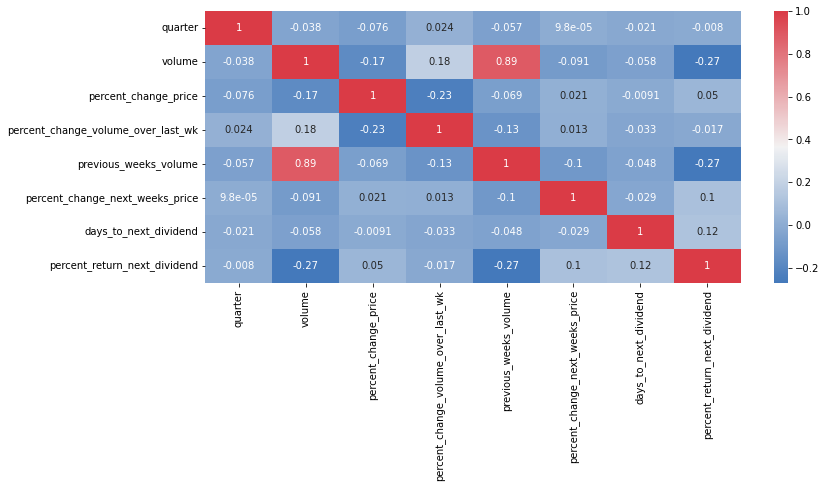

In [13]:
corr_m=data.corr()
fig, ax = plt.subplots(figsize=(12,5))
                               
cmap = sb.diverging_palette(250,10,as_cmap=True)
sb.heatmap(corr_m,annot=True,cmap=cmap)
plt.show()

Here , we can see that "percent_return_next_dividend" Column has most positive correlation with "days_to_next_dividend" and negative correlation with "volume" and "previous_weeks_volume"


In [14]:
corr_m['percent_return_next_dividend'].sort_values(ascending=False)

percent_return_next_dividend          1.000000
days_to_next_dividend                 0.119733
percent_change_next_weeks_price       0.103009
percent_change_price                  0.049963
quarter                              -0.007963
percent_change_volume_over_last_wk   -0.017486
volume                               -0.269797
previous_weeks_volume                -0.270266
Name: percent_return_next_dividend, dtype: float64

In [15]:
labels_reshaped = np.array(label).reshape(-1, 1)

ord_encoder=OrdinalEncoder()
labels_encoded=ord_encoder.fit_transform(labels_reshaped)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, random_state=42, test_size=0.3)

Applying Decision Tree Classifier to our Data

In [17]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

print('Accuracy score of decision tree classifier: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score of decision tree classifier: 0.9398


Here we sort the column "percent_return_next_dividend" from maximum returns to minimum return range so as to make the model predict 
which stocks will give the highest "percent_return_next_dividend".

In [18]:
X_test=X_test.sort_values(by="percent_return_next_dividend",ascending=False)
X_test

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
290,1,28.55,28.59,28.15,28.33,130584257,-0.770578,-23.463222,1.706164e+08,28.46,27.49,-3.408290,16,1.517830
682,2,30.55,30.61,30.11,30.34,95255686,-0.687398,11.952326,8.508594e+07,30.28,30.77,1.618230,26,1.417270
684,2,30.66,31.33,30.29,30.44,116043866,-0.717547,1.344117,1.145048e+08,30.65,31.68,3.360520,12,1.412610
674,2,30.75,30.84,30.01,30.65,108080405,-0.325203,-27.074364,1.482063e+08,30.42,30.68,0.854701,82,1.402940
681,2,31.48,31.65,30.52,30.65,85085937,-2.636590,15.207102,7.385477e+07,30.55,30.34,-0.687398,33,1.402940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2,11.47,11.69,11.29,11.69,479389107,1.918050,-27.251566,6.589683e+08,11.87,11.28,-4.970510,5,0.085543
405,2,12.28,12.43,11.91,11.93,623724296,-2.850160,8.054350,5.772320e+08,11.89,11.58,-2.607230,19,0.083822
43,1,14.38,14.52,13.79,14.20,712456757,-1.251740,55.414533,4.584235e+08,14.27,14.12,-1.051160,5,0.070422
45,1,14.18,14.70,13.92,14.38,805210688,1.410440,15.084058,6.996718e+08,14.26,14.04,-1.542780,82,0.069541


In [19]:
y_pred=dt.predict(X_test)
y_pred

array([24., 24., 24., 24., 24., 24., 27., 27., 27., 27., 27., 27., 20.,
       20., 20., 20., 22.,  8., 22.,  8., 22., 20., 20., 22.,  8., 22.,
       14.,  8., 22., 14., 22.,  8., 14., 17.,  8., 17.,  8., 17., 17.,
       13., 13., 13., 14., 17., 14., 14., 17., 14.,  7., 23., 17., 13.,
       17., 23.,  7., 23., 18.,  7.,  7., 17., 18., 23., 23.,  7., 18.,
        9., 18., 23., 23.,  9., 18.,  7.,  9.,  7.,  7.,  7., 16., 10.,
        6.,  6., 18.,  6., 18.,  7., 16.,  9., 25.,  6., 10.,  6.,  9.,
        6., 28., 28.,  9.,  9., 16.,  9., 10., 10.,  9.,  9., 25.,  6.,
        6., 10., 10., 28., 10., 10., 28., 10.,  9., 25., 19., 21., 26.,
       21., 26., 26., 15., 19., 16.,  2., 19., 25., 15., 19., 26., 19.,
       26., 19., 21.,  2.,  2., 15., 29., 15., 15., 29., 29., 21., 26.,
       19., 29.,  2., 29., 29., 26.,  2.,  2., 19., 21., 29., 26., 26.,
       29., 15., 15., 26., 15., 26.,  2., 19., 19., 26., 29., 29., 26.,
        4.,  4.,  4., 12., 12., 12.,  1., 12.,  4.,  4., 12.,  4

In [20]:
y_pred[0:20:1]

array([24., 24., 24., 24., 24., 24., 27., 27., 27., 27., 27., 27., 20.,
       20., 20., 20., 22.,  8., 22.,  8.])

In [25]:
label

1       AA
2       AA
3       AA
4       AA
5       AA
      ... 
745    XOM
746    XOM
747    XOM
748    XOM
749    XOM
Name: stock, Length: 720, dtype: object

In [22]:
d={}
i=0
for attr, value in label.items():
    if value not in d:
        d[value]=i
        i+=1
        

In [23]:
print(d)

{'AA': 0, 'AXP': 1, 'BA': 2, 'BAC': 3, 'CAT': 4, 'CSCO': 5, 'CVX': 6, 'DD': 7, 'DIS': 8, 'GE': 9, 'HD': 10, 'HPQ': 11, 'IBM': 12, 'INTC': 13, 'JNJ': 14, 'JPM': 15, 'KRFT': 16, 'KO': 17, 'MCD': 18, 'MMM': 19, 'MRK': 20, 'MSFT': 21, 'PFE': 22, 'PG': 23, 'T': 24, 'TRV': 25, 'UTX': 26, 'VZ': 27, 'WMT': 28, 'XOM': 29}


This is the final result after all the operations, we get the list of all stocks which provide the "percent_return_next_dividend" in a highest to 
lowest order. We see that Stock T and Stock VZ are two of the stocks which give the maximum "percent_return_next_dividend"

In [24]:
for i in y_pred:
    print(list(d.keys())[list(d.values()).index(int(i))])

T
T
T
T
T
T
VZ
VZ
VZ
VZ
VZ
VZ
MRK
MRK
MRK
MRK
PFE
DIS
PFE
DIS
PFE
MRK
MRK
PFE
DIS
PFE
JNJ
DIS
PFE
JNJ
PFE
DIS
JNJ
KO
DIS
KO
DIS
KO
KO
INTC
INTC
INTC
JNJ
KO
JNJ
JNJ
KO
JNJ
DD
PG
KO
INTC
KO
PG
DD
PG
MCD
DD
DD
KO
MCD
PG
PG
DD
MCD
GE
MCD
PG
PG
GE
MCD
DD
GE
DD
DD
DD
KRFT
HD
CVX
CVX
MCD
CVX
MCD
DD
KRFT
GE
TRV
CVX
HD
CVX
GE
CVX
WMT
WMT
GE
GE
KRFT
GE
HD
HD
GE
GE
TRV
CVX
CVX
HD
HD
WMT
HD
HD
WMT
HD
GE
TRV
MMM
MSFT
UTX
MSFT
UTX
UTX
JPM
MMM
KRFT
BA
MMM
TRV
JPM
MMM
UTX
MMM
UTX
MMM
MSFT
BA
BA
JPM
XOM
JPM
JPM
XOM
XOM
MSFT
UTX
MMM
XOM
BA
XOM
XOM
UTX
BA
BA
MMM
MSFT
XOM
UTX
UTX
XOM
JPM
JPM
UTX
JPM
UTX
BA
MMM
MMM
UTX
XOM
XOM
UTX
CAT
CAT
CAT
IBM
IBM
IBM
AXP
IBM
CAT
CAT
IBM
CAT
AXP
AXP
IBM
CAT
AXP
AXP
AXP
AXP
CSCO
CSCO
AXP
AXP
CSCO
CSCO
CSCO
HPQ
CSCO
HPQ
CSCO
CSCO
AA
AA
AA
AA
AA
AA
AA
AA
AA
BAC
BAC
BAC
BAC
BAC
BAC
